# Criação de Modelos de Machine Learning 

Utilizaremos para criação de modelos a biblioteca 'pycaret', que permite a comparação de vários algorítmos.

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.12


In [3]:
from pycaret.classification import *
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None)

--------------------------------------

Leitura do dataset

In [4]:
dtypes = {'n1': 'float64', 'n2': 'float64', 'resultado': 'float64', 'pc1': 'int32', 'pc2': 'float64', 'n3': 'float64', 'n4': 'float64', 'n5': 'float64', 'n6': 'float64', 'n7': 'float64', 'n8': 'float64', 'n9': 'float64', 'pc3': 'float64', 'pc4': 'float64',
        'pc5': 'float64', 'n10': 'float64', 'n11': 'float64', 'n12': 'float64', 'n13': 'float64', 'n14': 'float64', 'n15': 'float64', 'n16': 'float64', 'n17': 'float64', 'n18': 'float64', 'n19': 'float64', 'pf6': 'float64', 'n20': 'float64', 'pa1': 'float64',
        'pa2': 'float64', 'pa3': 'float64', 'pa4': 'float64', 'pa5': 'float64', 'pa6': 'float64', 'pa7': 'float64', 'pa8': 'float64', 'pa9': 'float64', 'pa10': 'float64', 'pa11': 'float64', 'pa12': 'float64', 'pa13': 'float64', 'pa14': 'float64', 'pa15': 'float64',
        'pa16': 'float64', 'pa17': 'float64', 'pa18': 'float64', 'pa19': 'float64', 'pa20': 'float64', 'pa21': 'float64', 'pa22': 'float64', 'pa23': 'float64', 'pa24': 'float64', 'pa25': 'float64', 'pa26': 'float64', 'pa27': 'float64', 'pa28': 'float64', 'pa29': 'float64',
        'pb1': 'float64', 'pb2': 'float64', 'pf1': 'float64', 'pf2': 'float64', 'pd1': 'float64', 'pd2': 'float64', 'pd3': 'float64', 'pd4': 'float64', 'pe1': 'float64', 'pe2': 'float64', 'pe3': 'float64', 'pe4': 'float64', 'pe5': 'float64', 'pe6': 'float64',
        'pe7': 'float64', 'pe8': 'float64', 'pe9': 'float64', 'pe10': 'float64', 'pe11': 'float64', 'pe12': 'float64', 'pe13': 'float64', 'pd5': 'float64', 'pd6': 'float64', 'pd7': 'int32'}

In [5]:
df = pd.read_csv('tratamento_parte2.csv', sep=';', dtype = dtypes ).drop(columns=['Unnamed: 0'])
# df.head()

-----------
Informações sobre o dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 80 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   n1         13233 non-null  float64
 1   n2         13233 non-null  float64
 2   resultado  13233 non-null  float64
 3   pc1        13233 non-null  int32  
 4   pc2        13233 non-null  float64
 5   n3         13233 non-null  float64
 6   n4         13233 non-null  float64
 7   n5         13233 non-null  float64
 8   n6         13233 non-null  float64
 9   n7         13233 non-null  float64
 10  n8         13233 non-null  float64
 11  n9         13233 non-null  float64
 12  pc3        13233 non-null  float64
 13  pc4        13233 non-null  float64
 14  n21        13233 non-null  float64
 15  n10        13233 non-null  float64
 16  n11        13233 non-null  float64
 17  n12        13233 non-null  float64
 18  n13        13233 non-null  float64
 19  n14        13233 non-null  float64
 20  n15   

-------------
Separação do dataset em conjunto de treino e teste

In [7]:
### Treino x Teste 30%
from sklearn.model_selection import train_test_split 
X, y = df.drop(['resultado'], axis = 1), df['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1985)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
df_modelo_train = pd.concat([X_train,y_train], axis=1)
df_modelo_test = pd.concat([X_test, y_test], axis=1)


----------
Pycaret

In [6]:
features_numericas = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21']

features_categorias = ['pc1', 'pc2', 'pc3', 'pc4', 'pa1', 'pa2', 'pa3', 'pa4', 'pa5', 'pa6', 'pa7', 'pa8', 'pa9', 'pa10', 'pa11', 'pa12', 'pa13', 'pa14', 'pa15', 'pa16', 'pa17', 'pa18', 'pa19', 'pa20', 'pa21',
       'pa22', 'pa23', 'pa24', 'pa25', 'pa26', 'pa27', 'pa28', 'pa29', 'pb1', 'pb2', 'pf1', 'pf2', 'pd1', 'pd2', 'pd3', 'pd4', 'pe1', 'pe2', 'pe3','pe4', 'pe5', 'pe6', 'pe7', 'pe8', 'pe9', 'pe10', 'pe11', 'pe12','pe13', 'pd5', 'pd6', 'pd7']

In [8]:
# Setup pycaret
pycaret.classification.setup(
                            data = df_modelo_train, 
                            target = 'resultado',  
                            test_data = df_modelo_test,  
                            categorical_features= features_categorias,  
                            numeric_features = features_numericas, 
                            remove_outliers = True, # usa o PCA redução linear dimensionalidade usando Singular Valeu Decomposition Technique
                            outliers_threshold = 0.1, 
                            remove_multicollinearity = True, 
                            multicollinearity_threshold = 0.9, 
                            remove_perfect_collinearity = True, 
                            feature_selection = True, #combinação de Random Forest, Adaboost e Linear correlation
                            feature_selection_threshold = 0.8,  
                            fix_imbalance = True, # dataset desdesbalanceado. SMOTE 
                            fold = 10, # k-fold cross validation 
                            session_id = 36, 
                            experiment_name = 'modelo_1', 
                            )

,Description,Value
0,session_id,36
1,Target,resultado
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(9263, 80)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,57
8,Ordinal Features,False
9,High Cardinality Features,False


(StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 True,
 [],
 'resultado',
 [('Setup Config',
                                  Description            Value
   0                               session_id               36
   1                                   Target        resultado
   2                              Target Type           Binary
   3                            Label Encoded   0.0: 0, 1.0: 1
   4                            Original Data       (9263, 80)
   5                           Missing Values            False
   6                         Numeric Features               22
   7                     Categorical Features               57
   8                         Ordinal Features            False
   9                High Cardinality Features            False
   10                 High Cardinality Method             None
   11                   Transformed Train Set       (8336, 87)
   12                    Transformed Test Set       (3970, 87)
   13   

Métricas

In [9]:
from sklearn.metrics import balanced_accuracy_score
add_metric('balanced_accuracy', 'BalancedAccuracy', balanced_accuracy_score, greater_is_better= True)
remove_metric('Accuracy')
remove_metric('Kappa')
remove_metric('MCC')


Os algorítimos escolhidos para criação dos modelos: Naïve Bayes, Regressão Logística e Extreme Gradient Boosting.

In [10]:
models = compare_models(sort = 'Recall', 
                        include= ['nb', # Naïve Bayes
                                  'lr', # Regressão Logística 
                                  'xgboost', # Extreme Gradient Boosting
                                  ]) 
results = pull()

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy,TT (Sec)
nb,Naive Bayes,0.7737,0.9210,0.1136,0.2023,0.7092,0.8160
lr,Logistic Regression,0.8013,0.8016,0.1491,0.2513,0.7404,0.7530
xgboost,Extreme Gradient Boosting,0.8263,0.1468,0.4192,0.2148,0.5665,2.4010


-------------------

## 1)  Naive Bayes

In [11]:
nb = create_model(estimator='nb', fold=10)

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.7656,0.9259,0.1124,0.2004,0.7098
1,0.7738,0.9273,0.1114,0.1988,0.7024
2,0.8018,0.9455,0.1182,0.2101,0.7237
3,0.7473,0.9091,0.1139,0.2024,0.7049
4,0.7856,0.9636,0.1170,0.2087,0.7251
5,0.7813,0.9273,0.1081,0.1935,0.6934
6,0.8345,0.9815,0.1186,0.2116,0.7379
7,0.7095,0.8148,0.1053,0.1864,0.6674
8,0.8080,0.9259,0.1199,0.2123,0.7274
9,0.7293,0.8889,0.1119,0.1988,0.6999


Ajustes de Hiperparâmetros - Objetivando melhorar a performance da métrica recall de cada modelo, será aplicado random grid search para alteração dos hiperparâmetros de cada modelo. 

In [12]:
nb_tuned = tune_model(nb, optimize= 'Recall', n_iter=200, choose_better=True)
results_nb_tuned = pull()

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.7656,0.9259,0.1124,0.2004,0.7098
1,0.7738,0.9273,0.1114,0.1988,0.7024
2,0.8018,0.9455,0.1182,0.2101,0.7237
3,0.7473,0.9091,0.1139,0.2024,0.7049
4,0.7856,0.9636,0.1170,0.2087,0.7251
5,0.7813,0.9273,0.1081,0.1935,0.6934
6,0.8345,0.9815,0.1186,0.2116,0.7379
7,0.7095,0.8148,0.1053,0.1864,0.6674
8,0.8080,0.9259,0.1199,0.2123,0.7274
9,0.7293,0.8889,0.1119,0.1988,0.6999


In [13]:
print(nb_tuned)

GaussianNB(priors=None, var_smoothing=1e-09)


Predict

In [14]:
pred_nb = predict_model(nb_tuned)
results_nb_pred = pull()

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Naive Bayes,0.7522,0.8852,0.1155,0.2043,0.6952


In [15]:
pred_nb.head(15)

,pa14_0.0,pe7_0.0,pc3_0.1666666716337204,n14,n12,pc4_0.5555555820465088,n8,n6,pa22_0.0,pa17_0.0,...,pe3_0.0,n15,pa20_0.0,n1,n18,pc4_0.7777777910232544,n16,resultado,Label,Score
0,1.0,1.0,0.0,0.067358,0.597826,0.0,0.059727,0.001328,1.0,1.0,...,1.0,0.00,1.0,0.15,0.001404,0.0,0.12,0.0,1.0,1.0000
1,1.0,1.0,0.0,0.010363,0.478261,0.0,0.010239,0.000170,1.0,1.0,...,1.0,0.02,1.0,0.05,0.082865,0.0,0.04,0.0,0.0,1.0000
2,1.0,1.0,0.0,0.000000,0.358696,0.0,0.001706,0.000000,1.0,1.0,...,1.0,0.00,1.0,0.05,0.043539,0.0,0.04,0.0,1.0,1.0000
3,1.0,1.0,0.0,0.000000,0.402174,0.0,0.035836,0.000000,1.0,1.0,...,1.0,0.10,1.0,0.05,0.028090,0.0,0.24,0.0,1.0,1.0000
4,1.0,1.0,0.0,0.000000,0.326087,0.0,0.015358,0.000815,1.0,1.0,...,1.0,0.08,1.0,0.05,0.064607,0.0,0.20,0.0,0.0,1.0000
5,1.0,1.0,0.0,0.000000,0.358696,0.0,0.029010,0.000129,1.0,1.0,...,1.0,0.16,1.0,0.10,0.167135,0.0,0.28,0.0,1.0,1.0000
6,1.0,1.0,0.0,0.056995,0.521739,0.0,0.039249,0.000000,1.0,1.0,...,1.0,0.00,1.0,0.00,0.007022,0.0,0.04,0.0,1.0,1.0000
7,1.0,1.0,0.0,0.000000,0.250000,0.0,0.001706,0.000328,1.0,1.0,...,1.0,0.00,1.0,0.00,0.023876,0.0,0.00,0.0,1.0,0.7580
8,1.0,1.0,0.0,0.036269,0.315217,0.0,0.087031,0.000000,1.0,1.0,...,1.0,0.12,1.0,0.05,0.035112,0.0,0.28,0.0,0.0,1.0000
9,1.0,1.0,0.0,0.000000,0.619565,0.0,0.008532,0.000671,1.0,1.0,...,1.0,0.02,1.0,0.10,0.002809,0.0,0.08,0.0,0.0,1.0000


In [16]:
pred_nb.head(15)[['resultado', 'Label', 'Score']]

,resultado,Label,Score
0,0.0,1.0,1.0000
1,0.0,0.0,1.0000
2,0.0,1.0,1.0000
3,0.0,1.0,1.0000
4,0.0,0.0,1.0000
5,0.0,1.0,1.0000
6,0.0,1.0,1.0000
7,0.0,1.0,0.7580
8,0.0,0.0,1.0000
9,0.0,0.0,1.0000


Matriz confusão 

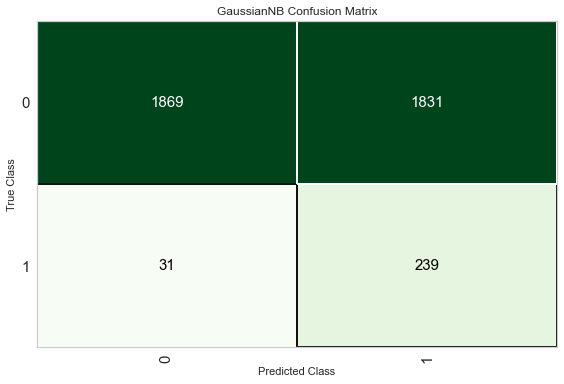

In [17]:
plot_model(nb_tuned, plot = 'confusion_matrix') 

Curva ROC

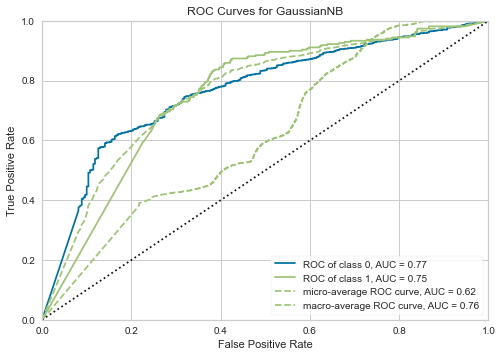

In [18]:
plot_model(nb_tuned, plot = 'auc')

Erros

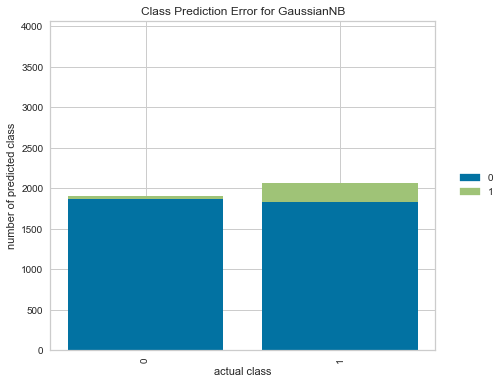

In [19]:
plot_model(nb_tuned, plot = 'error')

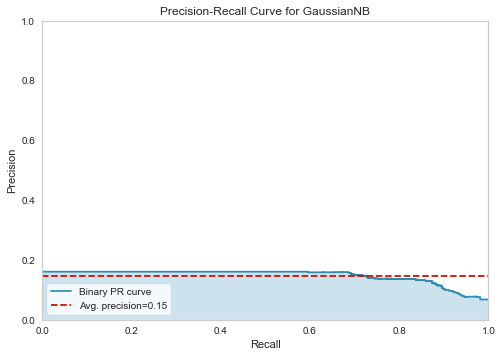

In [20]:
plot_model(nb_tuned, plot = 'pr')

In [21]:
# plot_model(nb_tuned, plot='feature')


----------

## 2) Regressão Logística

In [22]:

lr = create_model(estimator='lr', fold=10)



,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.8344,0.7963,0.1564,0.2614,0.7494
1,0.8212,0.8364,0.1570,0.2644,0.7596
2,0.8302,0.8364,0.1565,0.2636,0.7590
3,0.7858,0.8182,0.1429,0.2432,0.7358
4,0.8000,0.7818,0.1558,0.2598,0.7414
5,0.7958,0.8727,0.1524,0.2595,0.7650
6,0.8259,0.8333,0.1557,0.2624,0.7601
7,0.7500,0.7407,0.1274,0.2174,0.6945
8,0.8080,0.7778,0.1495,0.2507,0.7355
9,0.7619,0.7222,0.1373,0.2308,0.7039


Ajustes de Hiperparâmetros - Objetivando melhorar a performance da métrica recall de cada modelo, será aplicado random grid search para alteração dos hiperparâmetros de cada modelo. 

In [24]:
lr_tuned = tune_model(lr, optimize= 'Recall', 
                      n_iter=200, 
                      choose_better=True)
results_lr_tuned = pull()

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.8227,0.8519,0.1581,0.2667,0.7689
1,0.8184,0.8364,0.1474,0.2507,0.7475
2,0.8320,0.8545,0.1582,0.2670,0.7668
3,0.7824,0.8545,0.1473,0.2513,0.7527
4,0.8028,0.8182,0.1531,0.2579,0.7493
5,0.7993,0.8727,0.1534,0.2609,0.7663
6,0.8169,0.8148,0.1512,0.2551,0.7489
7,0.7485,0.7407,0.1246,0.2133,0.6900
8,0.8060,0.8148,0.1517,0.2558,0.7495
9,0.7577,0.7407,0.1365,0.2305,0.7080


In [25]:
print(lr_tuned)

LogisticRegression(C=0.072, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=36, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Predict

In [26]:
pred_lr = predict_model(lr_tuned)
results_lr_pred = pull()

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Logistic Regression,0.8007,0.8556,0.1445,0.2472,0.7429


In [27]:
pred_lr.head(15)

,pa14_0.0,pe7_0.0,pc3_0.1666666716337204,n14,n12,pc4_0.5555555820465088,n8,n6,pa22_0.0,pa17_0.0,...,pe3_0.0,n15,pa20_0.0,n1,n18,pc4_0.7777777910232544,n16,resultado,Label,Score
0,1.0,1.0,0.0,0.067358,0.597826,0.0,0.059727,0.001328,1.0,1.0,...,1.0,0.00,1.0,0.15,0.001404,0.0,0.12,0.0,1.0,0.8686
1,1.0,1.0,0.0,0.010363,0.478261,0.0,0.010239,0.000170,1.0,1.0,...,1.0,0.02,1.0,0.05,0.082865,0.0,0.04,0.0,0.0,0.9311
2,1.0,1.0,0.0,0.000000,0.358696,0.0,0.001706,0.000000,1.0,1.0,...,1.0,0.00,1.0,0.05,0.043539,0.0,0.04,0.0,0.0,0.6201
3,1.0,1.0,0.0,0.000000,0.402174,0.0,0.035836,0.000000,1.0,1.0,...,1.0,0.10,1.0,0.05,0.028090,0.0,0.24,0.0,1.0,0.6493
4,1.0,1.0,0.0,0.000000,0.326087,0.0,0.015358,0.000815,1.0,1.0,...,1.0,0.08,1.0,0.05,0.064607,0.0,0.20,0.0,0.0,0.9310
5,1.0,1.0,0.0,0.000000,0.358696,0.0,0.029010,0.000129,1.0,1.0,...,1.0,0.16,1.0,0.10,0.167135,0.0,0.28,0.0,1.0,0.6067
6,1.0,1.0,0.0,0.056995,0.521739,0.0,0.039249,0.000000,1.0,1.0,...,1.0,0.00,1.0,0.00,0.007022,0.0,0.04,0.0,1.0,0.8216
7,1.0,1.0,0.0,0.000000,0.250000,0.0,0.001706,0.000328,1.0,1.0,...,1.0,0.00,1.0,0.00,0.023876,0.0,0.00,0.0,0.0,0.8463
8,1.0,1.0,0.0,0.036269,0.315217,0.0,0.087031,0.000000,1.0,1.0,...,1.0,0.12,1.0,0.05,0.035112,0.0,0.28,0.0,1.0,0.6390
9,1.0,1.0,0.0,0.000000,0.619565,0.0,0.008532,0.000671,1.0,1.0,...,1.0,0.02,1.0,0.10,0.002809,0.0,0.08,0.0,0.0,0.8813


In [28]:
pred_lr.head(15)[['resultado', 'Label', 'Score']]

,resultado,Label,Score
0,0.0,1.0,0.8686
1,0.0,0.0,0.9311
2,0.0,0.0,0.6201
3,0.0,1.0,0.6493
4,0.0,0.0,0.9310
5,0.0,1.0,0.6067
6,0.0,1.0,0.8216
7,0.0,0.0,0.8463
8,0.0,1.0,0.6390
9,0.0,0.0,0.8813


Matriz Confusão 

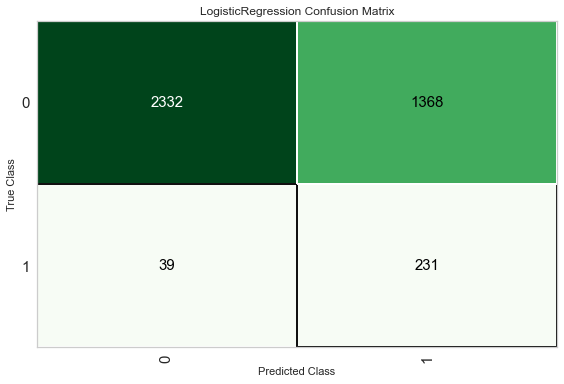

In [29]:
plot_model(lr_tuned, plot = 'confusion_matrix') 

Curva ROC

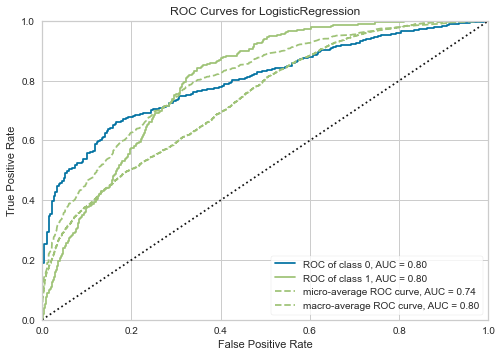

In [30]:
plot_model(lr_tuned, plot = 'auc')

Erro

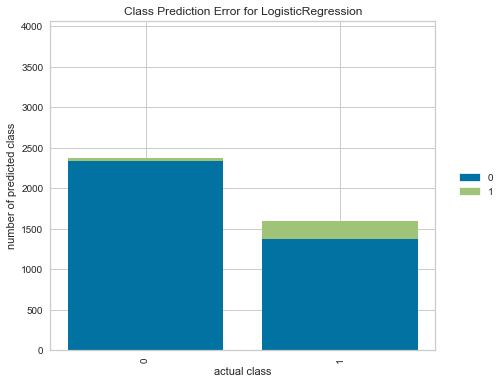

In [31]:
plot_model(lr_tuned, plot = 'error')

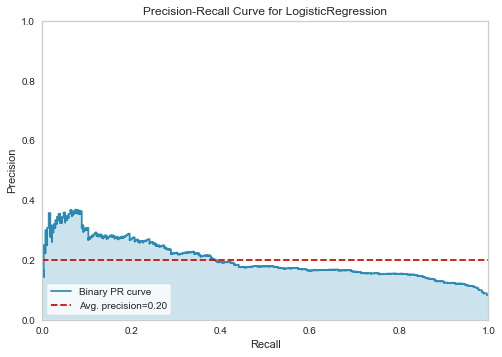

In [32]:
plot_model(lr_tuned, plot = 'pr')

Features Importance

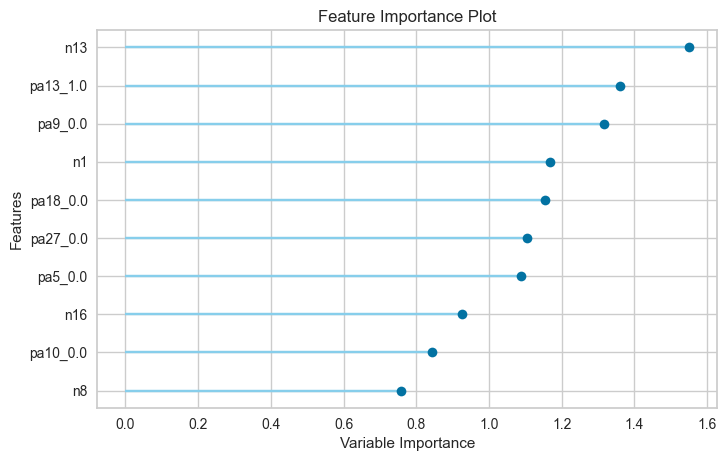

In [33]:
plot_model(lr_tuned, plot='feature')

--------

## 3) Xgboost

In [34]:
xgboost = create_model(estimator='xgboost', fold=10)

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.8151,0.1296,0.3684,0.1918,0.5571
1,0.8793,0.2000,0.5000,0.2857,0.5929
2,0.8589,0.1818,0.5263,0.2703,0.5851
3,0.8067,0.0727,0.4444,0.1250,0.5332
4,0.8046,0.1273,0.4118,0.1944,0.5572
5,0.8060,0.1455,0.4211,0.2162,0.5657
6,0.8543,0.2222,0.4615,0.3000,0.6021
7,0.7720,0.2037,0.4583,0.2821,0.5935
8,0.8482,0.1111,0.3333,0.1667,0.5479
9,0.8183,0.0741,0.2667,0.1159,0.5300


Ajuste de Hiperparâmetros - Objetivando melhorar a performance da métrica recall de cada modelo, será aplicado random grid search para alteração dos hiperparâmetros de cada modelo. 

In [35]:
xgboost_tuned = tune_model(xgboost, optimize= 'Recall', n_iter=20, choose_better=True)
results_xgboost_tuned = pull()

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.7885,0.9815,0.0859,0.1580,0.6292
1,0.7948,0.9818,0.0836,0.1541,0.6109
2,0.8202,1.0000,0.0832,0.1536,0.6110
3,0.7820,1.0000,0.0820,0.1515,0.6046
4,0.7739,0.9818,0.0826,0.1523,0.6058
5,0.7680,0.9818,0.0833,0.1536,0.6097
6,0.8288,0.9815,0.0817,0.1508,0.6082
7,0.7538,0.9815,0.0843,0.1552,0.6210
8,0.7987,1.0000,0.0849,0.1565,0.6264
9,0.7542,0.9259,0.0832,0.1527,0.6093


In [36]:
print(xgboost_tuned)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=36,
              reg_alpha=1, reg_lambda=1e-06, scale_pos_weight=42.6,
              subsample=0.7, tree_method='auto', use_label_encoder=True,
              validate_parameters=1, verbosity=0)


Predict

In [37]:
pred_xgboost = predict_model(xgboost_tuned)
results_xgboost_pred = pull()

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Extreme Gradient Boosting,0.7734,0.9926,0.0865,0.1591,0.6137


In [38]:
pred_xgboost.head(15)

,pa14_0.0,pe7_0.0,pc3_0.1666666716337204,n14,n12,pc4_0.5555555820465088,n8,n6,pa22_0.0,pa17_0.0,...,pe3_0.0,n15,pa20_0.0,n1,n18,pc4_0.7777777910232544,n16,resultado,Label,Score
0,1.0,1.0,0.0,0.067358,0.597826,0.0,0.059727,0.001328,1.0,1.0,...,1.0,0.00,1.0,0.15,0.001404,0.0,0.12,0.0,1.0,0.5891
1,1.0,1.0,0.0,0.010363,0.478261,0.0,0.010239,0.000170,1.0,1.0,...,1.0,0.02,1.0,0.05,0.082865,0.0,0.04,0.0,0.0,0.5246
2,1.0,1.0,0.0,0.000000,0.358696,0.0,0.001706,0.000000,1.0,1.0,...,1.0,0.00,1.0,0.05,0.043539,0.0,0.04,0.0,1.0,0.5362
3,1.0,1.0,0.0,0.000000,0.402174,0.0,0.035836,0.000000,1.0,1.0,...,1.0,0.10,1.0,0.05,0.028090,0.0,0.24,0.0,1.0,0.5731
4,1.0,1.0,0.0,0.000000,0.326087,0.0,0.015358,0.000815,1.0,1.0,...,1.0,0.08,1.0,0.05,0.064607,0.0,0.20,0.0,1.0,0.5331
5,1.0,1.0,0.0,0.000000,0.358696,0.0,0.029010,0.000129,1.0,1.0,...,1.0,0.16,1.0,0.10,0.167135,0.0,0.28,0.0,1.0,0.5714
6,1.0,1.0,0.0,0.056995,0.521739,0.0,0.039249,0.000000,1.0,1.0,...,1.0,0.00,1.0,0.00,0.007022,0.0,0.04,0.0,1.0,0.5651
7,1.0,1.0,0.0,0.000000,0.250000,0.0,0.001706,0.000328,1.0,1.0,...,1.0,0.00,1.0,0.00,0.023876,0.0,0.00,0.0,0.0,0.5488
8,1.0,1.0,0.0,0.036269,0.315217,0.0,0.087031,0.000000,1.0,1.0,...,1.0,0.12,1.0,0.05,0.035112,0.0,0.28,0.0,0.0,0.5370
9,1.0,1.0,0.0,0.000000,0.619565,0.0,0.008532,0.000671,1.0,1.0,...,1.0,0.02,1.0,0.10,0.002809,0.0,0.08,0.0,1.0,0.5102


In [39]:
pred_xgboost.head(15)[['resultado', 'Label', 'Score']]

,resultado,Label,Score
0,0.0,1.0,0.5891
1,0.0,0.0,0.5246
2,0.0,1.0,0.5362
3,0.0,1.0,0.5731
4,0.0,1.0,0.5331
5,0.0,1.0,0.5714
6,0.0,1.0,0.5651
7,0.0,0.0,0.5488
8,0.0,0.0,0.5370
9,0.0,1.0,0.5102


Matriz Confusão

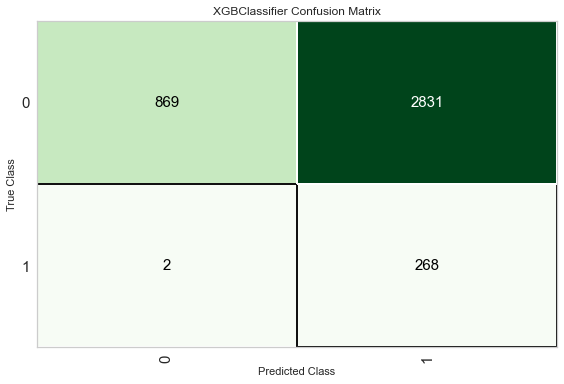

In [40]:
plot_model(xgboost_tuned, plot = 'confusion_matrix') 

Curva ROC

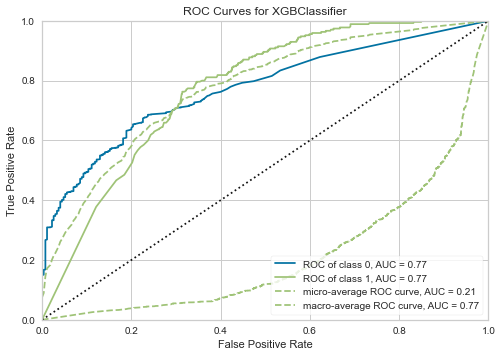

In [41]:
plot_model(xgboost_tuned, plot = 'auc')

Erros

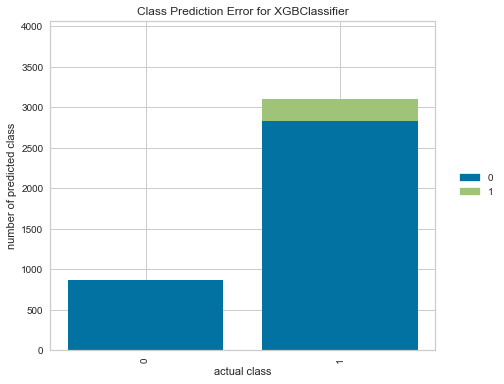

In [42]:
plot_model(xgboost_tuned, plot = 'error')

Precision x Recall

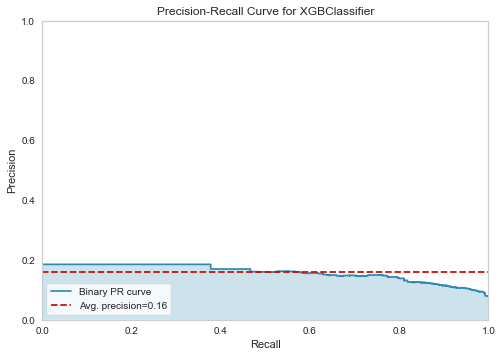

In [43]:
plot_model(xgboost_tuned, plot = 'pr')

Feature importance

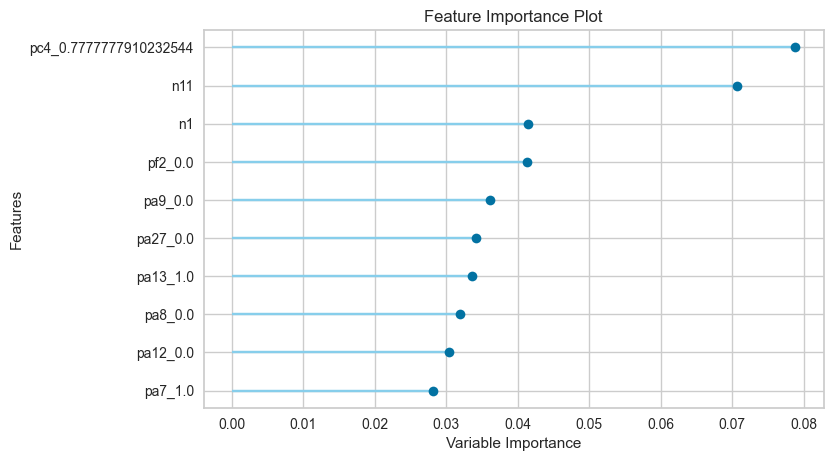

In [44]:
plot_model(xgboost_tuned, plot='feature') 

-----------------------

Modelos após ajuste de hiperparâmetros

In [45]:
print(nb_tuned)
print(lr_tuned)
print(xgboost_tuned)

GaussianNB(priors=None, var_smoothing=1e-09)
LogisticRegression(C=0.072, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=36, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', predictor='auto', random_state=36,
              reg_alpha=1, reg_lambda=1e-06, scale_pos_weight=42.6,
              subsample=0.7, tree

-------------------

Resumo dos resultados - Conjunto teste

In [48]:
results_nb_pred

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Naive Bayes,0.7522,0.8852,0.1155,0.2043,0.6952


In [47]:
results_lr_pred

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Logistic Regression,0.8007,0.8556,0.1445,0.2472,0.7429


In [49]:
results_xgboost_pred

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Extreme Gradient Boosting,0.7734,0.9926,0.0865,0.1591,0.6137


In [61]:
pd.concat([results_nb_pred,results_lr_pred,results_xgboost_pred])

,Model,AUC,Recall,Prec.,F1,BalancedAccuracy
0,Naive Bayes,0.7522,0.8852,0.1155,0.2043,0.6952
0,Logistic Regression,0.8007,0.8556,0.1445,0.2472,0.7429
0,Extreme Gradient Boosting,0.7734,0.9926,0.0865,0.1591,0.6137


----------------------

Resultados - Conjunto Treino

In [52]:
results_nb_tuned

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.7656,0.9259,0.1124,0.2004,0.7098
1,0.7738,0.9273,0.1114,0.1988,0.7024
2,0.8018,0.9455,0.1182,0.2101,0.7237
3,0.7473,0.9091,0.1139,0.2024,0.7049
4,0.7856,0.9636,0.1170,0.2087,0.7251
5,0.7813,0.9273,0.1081,0.1935,0.6934
6,0.8345,0.9815,0.1186,0.2116,0.7379
7,0.7095,0.8148,0.1053,0.1864,0.6674
8,0.8080,0.9259,0.1199,0.2123,0.7274
9,0.7293,0.8889,0.1119,0.1988,0.6999


In [53]:
results_lr_tuned

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.8227,0.8519,0.1581,0.2667,0.7689
1,0.8184,0.8364,0.1474,0.2507,0.7475
2,0.8320,0.8545,0.1582,0.2670,0.7668
3,0.7824,0.8545,0.1473,0.2513,0.7527
4,0.8028,0.8182,0.1531,0.2579,0.7493
5,0.7993,0.8727,0.1534,0.2609,0.7663
6,0.8169,0.8148,0.1512,0.2551,0.7489
7,0.7485,0.7407,0.1246,0.2133,0.6900
8,0.8060,0.8148,0.1517,0.2558,0.7495
9,0.7577,0.7407,0.1365,0.2305,0.7080


In [54]:
results_xgboost_tuned

,AUC,Recall,Prec.,F1,BalancedAccuracy
0,0.7885,0.9815,0.0859,0.1580,0.6292
1,0.7948,0.9818,0.0836,0.1541,0.6109
2,0.8202,1.0000,0.0832,0.1536,0.6110
3,0.7820,1.0000,0.0820,0.1515,0.6046
4,0.7739,0.9818,0.0826,0.1523,0.6058
5,0.7680,0.9818,0.0833,0.1536,0.6097
6,0.8288,0.9815,0.0817,0.1508,0.6082
7,0.7538,0.9815,0.0843,0.1552,0.6210
8,0.7987,1.0000,0.0849,0.1565,0.6264
9,0.7542,0.9259,0.0832,0.1527,0.6093
